# **NAIVAS PYTHON DATA ANALYSIS**

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import rawdata**

In [2]:
df = pd.read_excel("C:/Users/hp/Downloads/BlinkIT Grocery Data.xlsx")

In [3]:
df.head(10)


,Item_Fat _Content,Item_Identifier,Item_Type,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Visibility,Item_Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2014,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [4]:
df.shape


(8523, 12)

### *DATA TYPES*

In [5]:
df.dtypes

Item_Fat _Content             object
Item_Identifier               object
Item_Type                     object
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
Item_Visibility              float64
Item_Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### *DATA CLEANING*

In [6]:
print(df['Item_Fat _Content'].unique())


['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [10]:
df['Item_Fat _Content'] = df['Item_Fat _Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})


In [11]:
print(df['Item_Fat _Content'].unique())

['Regular' 'Low Fat']


## **Business Requirments**

## **KPI Requirments**

In [7]:
# Total Sales
total_sales = df['Sales'].sum()

# Average Sales
avg_sales = df['Sales'].mean()

# No of Items sold
no_of_items_sold = df['Sales'].count()

# Average Ratings
avg_ratings = df['Rating'].mean()

# Display
print(f"Total Sales: {total_sales:,.0f}")
print(f"Average Sales: {avg_sales:,.0f}")
print(f"No of Items Sold: {no_of_items_sold:,.0f}")
print(f"Average Ratings: {avg_ratings:,.2f}")


Total Sales: 1,201,681
Average Sales: 141
No of Items Sold: 8,523
Average Ratings: 3.97


## **Charts Requirments**

### **Total Sales by Fat Content**

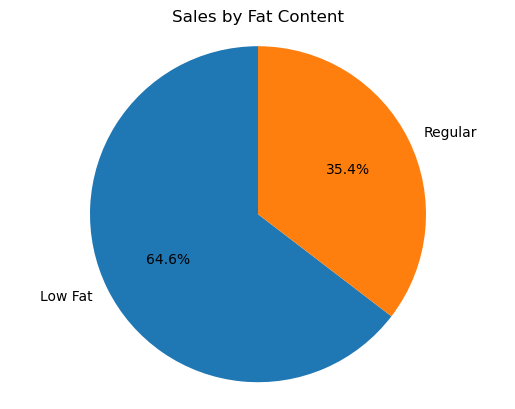

In [12]:
import matplotlib.pyplot as plt

# Group data by Item_Fat_Content and sum sales
sales_by_fat = df.groupby('Item_Fat _Content')['Sales'].sum()

# Plot pie chart
plt.pie(
    sales_by_fat,
    labels=sales_by_fat.index,      # use index (Low Fat, Regular, etc.) as labels
    autopct='%.1f%%',               # show percentages with 1 decimal place
    startangle=90                   # rotate start for better look
)

plt.title('Sales by Fat Content')
plt.axis('equal')   # make the pie chart a perfect circle
plt.show()


### **Total Sales by Fat Content**

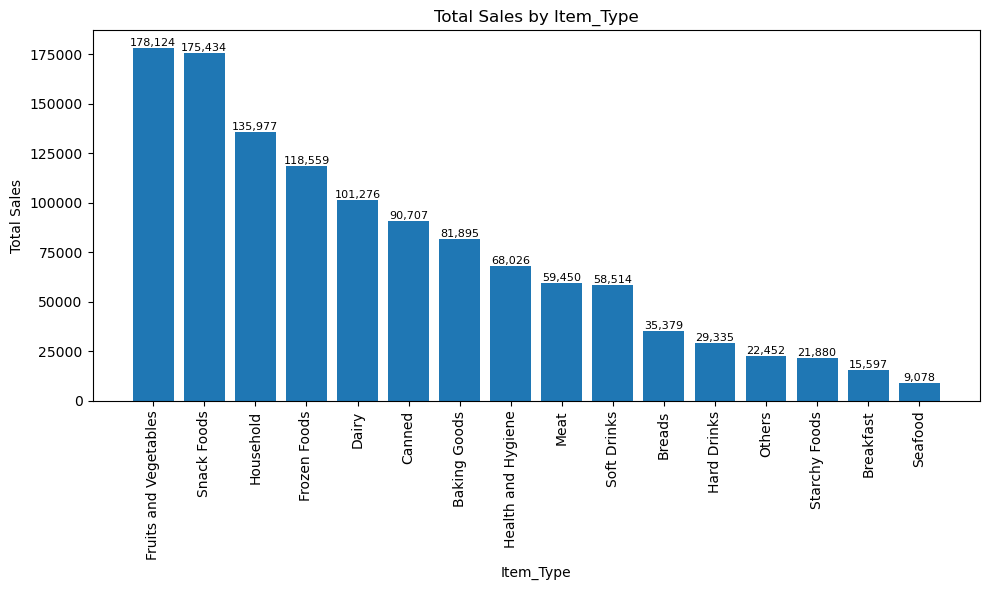

In [15]:
sales_by_type = df.groupby('Item_Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=90)
plt.xlabel('Item_Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item_Type')

# Add labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### **Fat Content by Outlet for Total Sales**

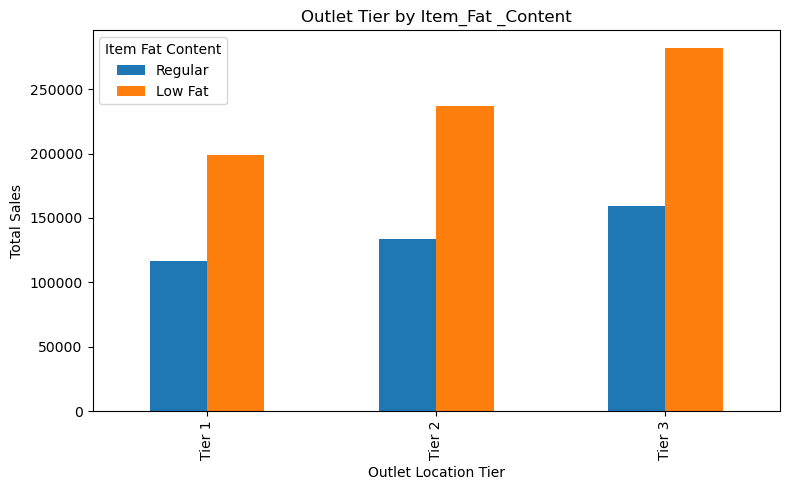

In [9]:
# (optional) standardize column names if you have inconsistent spacing/casing
# df.columns = df.columns.str.strip()

# Group and pivot so each fat-content type becomes a column
grouped = df.groupby(['Outlet_Location_Type', 'Item_Fat _Content'])['Sales'].sum().unstack()

# Keep only the fat-content columns we care about (and control order)
grouped = grouped[['Regular', 'Low Fat']]

# Plot a grouped bar chart
ax = grouped.plot(kind='bar', figsize=(8,5), title='Outlet Tier by Item_Fat _Content')

plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()


### **Total Sales by Outlet Establishment**

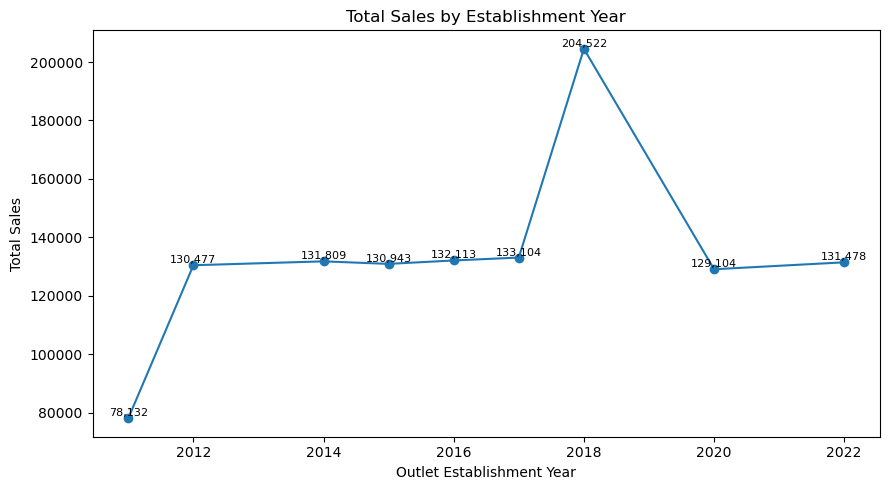

In [12]:
# Group sales by year and sum them
sales_by_year = df.groupby('Outlet_Establishment_Year')['Sales'].sum().sort_index()

# Create a figure
plt.figure(figsize=(9,5))

# Plot a line chart
plt.plot(sales_by_year.index, sales_by_year, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Establishment Year')

# Annotate points on the chart
for x, y in zip(sales_by_year.index, sales_by_year):
    plt.text(x, y, f'{y:,.0f}', va='bottom', ha='center', fontsize=8)

# Adjust layout and show
plt.tight_layout()
plt.show()


### **Sales by Outlet Size**

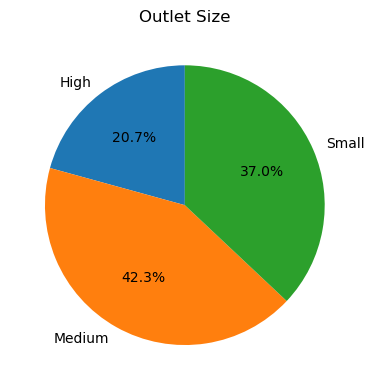

In [16]:
sales_by_size = df.groupby('Outlet_Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size,labels=sales_by_size.index,autopct='%1.1f%%',startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

### **Sales by Outlet Location**

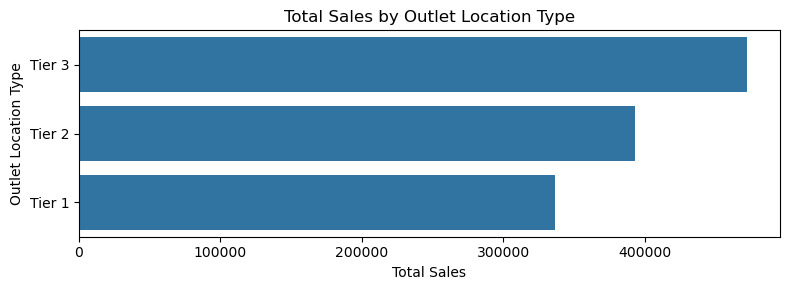

In [3]:
sales_by_location = df.groupby('Outlet_Location_Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8,3))
ax = sns.barplot(x='Sales',y='Outlet_Location_Type',data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()